In [2]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
tweet_df = pd.read_csv('/home/karen/Documents/Datasets/training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
tweet_df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
tweet_df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [5]:
len(tweet_df)

1600000

In [6]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
tweet_df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [8]:
tweet_df['target'].nunique()

2

In [9]:
tweet_df.target.value_counts()

0    800000
4    800000
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

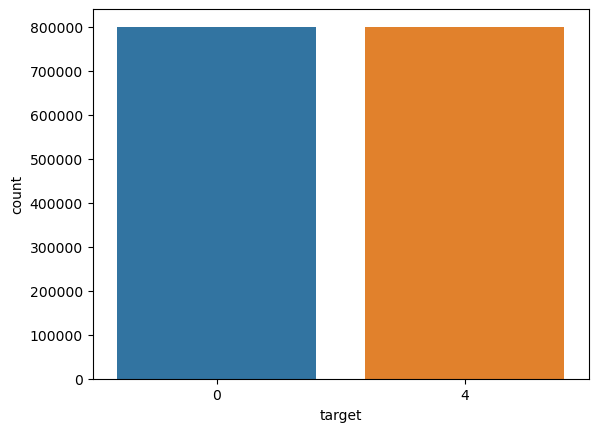

In [10]:
sns.countplot(x='target', data=tweet_df)

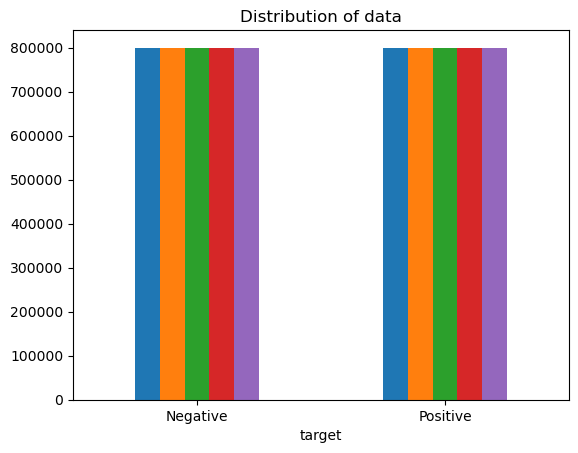

In [11]:
# Plotting the distribution for dataset.
ax = tweet_df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(tweet_df['text']), list(tweet_df['target'])

In [12]:
data = tweet_df[['text', 'target']]
data

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,4
1599996,TheWDB.com - Very cool to hear old Walt interv...,4
1599997,Are you ready for your MoJo Makeover? Ask me f...,4
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4


In [13]:
data['target'] = data['target'].replace(4,1)

/tmp/ipykernel_32289/2499609609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [14]:
data

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,1
1599996,TheWDB.com - Very cool to hear old Walt interv...,1
1599997,Are you ready for your MoJo Makeover? Ask me f...,1
1599998,Happy 38th Birthday to my boo of alll time!!! ...,1


In [15]:
#Separating positive and negative tweets
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [16]:
#Taking one fourth of data so it can run easily
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [17]:
#Combining positive and negative tweets
dataset = pd.concat([data_neg, data_pos])

In [18]:
dataset

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
819995,We just met some awesome people at T.G.I Fridays,1
819996,oh my goodness . my feet are the most sensitiv...,1
819997,@hey_angy hahaha,1
819998,@Lamartian30 Pfft school is koo. I'm ranked 2n...,1


In [19]:
dataset['text'] = dataset['text'].str.lower()
dataset['text']

0         @switchfoot http://twitpic.com/2y1zl - awww, t...
1         is upset that he can't update his facebook by ...
2         @kenichan i dived many times for the ball. man...
3           my whole body feels itchy and like its on fire 
4         @nationwideclass no, it's not behaving at all....
                                ...                        
819995    we just met some awesome people at t.g.i fridays 
819996    oh my goodness . my feet are the most sensitiv...
819997                                    @hey_angy hahaha 
819998    @lamartian30 pfft school is koo. i'm ranked 2n...
819999    stuffed. working out, shower,movie night, thn ...
Name: text, Length: 40000, dtype: object

In [20]:
#Stopwords
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [21]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text']

0         @switchfoot http://twitpic.com/2y1zl - awww, t...
1         upset can't update facebook texting it... migh...
2         @kenichan dived many times ball. managed save ...
3                          whole body feels itchy like fire
4         @nationwideclass no, it's not behaving all. i'...
                                ...                        
819995                     met awesome people t.g.i fridays
819996    oh goodness . feet sensitive part body . shit ...
819997                                     @hey_angy hahaha
819998    @lamartian30 pfft school koo. i'm ranked 2nd e...
819999    stuffed. working out, shower,movie night, thn ...
Name: text, Length: 40000, dtype: object

In [22]:
#cleaning and renoving punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text']

0         switchfoot httptwitpiccom2y1zl  awww thats bum...
1         upset cant update facebook texting it might cr...
2         kenichan dived many times ball managed save 50...
3                          whole body feels itchy like fire
4         nationwideclass no its not behaving all im mad...
                                ...                        
819995                       met awesome people tgi fridays
819996    oh goodness  feet sensitive part body  shit fe...
819997                                       heyangy hahaha
819998    lamartian30 pfft school koo im ranked 2nd expe...
819999    stuffed working out showermovie night thn slee...
Name: text, Length: 40000, dtype: object

In [23]:
#cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text']

0         switchfoot httptwitpiccom21zl  awww thats bumm...
1         upset cant update facebook texting it might cr...
2         kenichan dived many times ball managed save 50...
3                          whole body feels itchy like fire
4         nationwideclass no its not behaving all im mad...
                                ...                        
819995                       met awesome people tgi fridays
819996    oh goodness  feet sensitive part body  shit fe...
819997                                       heyangy hahaha
819998    lamartian30 pfft school koo im ranked 2nd expe...
819999    stuffed working out showermovie night thn slee...
Name: text, Length: 40000, dtype: object

In [24]:
#cleaning and removing urls
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text']

0         switchfoot httptwitpiccom21zl  a s bummer shou...
1         upset cant update facebook texting it might cr...
2         kenichan dived many times ball managed save 50...
3                          whole body feels itchy like fire
4         nationwideclass no its not behaving all im mad...
                                ...                        
819995                       met awesome people tgi fridays
819996    oh goodness  feet sensitive part body  shit fe...
819997                                       heyangy hahaha
819998    lamartian30 pfft school koo im ranked 2nd expe...
819999    stuffed working out showermovie night thn slee...
Name: text, Length: 40000, dtype: object

In [25]:
#cleaning and removing numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text']

0         switchfoot httptwitpiccomzl  a s bummer should...
1         upset cant update facebook texting it might cr...
2         kenichan dived many times ball managed save  r...
3                          whole body feels itchy like fire
4         nationwideclass no its not behaving all im mad...
                                ...                        
819995                       met awesome people tgi fridays
819996    oh goodness  feet sensitive part body  shit fe...
819997                                       heyangy hahaha
819998    lamartian pfft school koo im ranked nd experim...
819999    stuffed working out showermovie night thn slee...
Name: text, Length: 40000, dtype: object

In [26]:
# word tokenization
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+', text)
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text']

0         [s, itchfoot httpt, itpiccomzl  a s bummer sho...
1         [upset cant update facebook texting it might c...
2         [kenichan dived many times ball managed save  ...
3                         [hole body feels itchy like fire]
4         [nation, ideclass no its not behaving all im m...
                                ...                        
819995                    [met a, esome people tgi fridays]
819996    [oh goodness  feet sensitive part body  shit f...
819997                                     [heyangy hahaha]
819998    [lamartian pfft school koo im ranked nd experi...
819999    [stuffed , orking out sho, ermovie night thn s...
Name: text, Length: 40000, dtype: object

In [27]:
# Stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text']

0         [s, itchfoot httpt, itpiccomzl  a s bummer sho...
1         [upset cant update facebook texting it might c...
2         [kenichan dived many times ball managed save  ...
3                         [hole body feels itchy like fire]
4         [nation, ideclass no its not behaving all im m...
                                ...                        
819995                    [met a, esome people tgi fridays]
819996    [oh goodness  feet sensitive part body  shit f...
819997                                     [heyangy hahaha]
819998    [lamartian pfft school koo im ranked nd experi...
819999    [stuffed , orking out sho, ermovie night thn s...
Name: text, Length: 40000, dtype: object

In [28]:
X=data.text
y=data.target

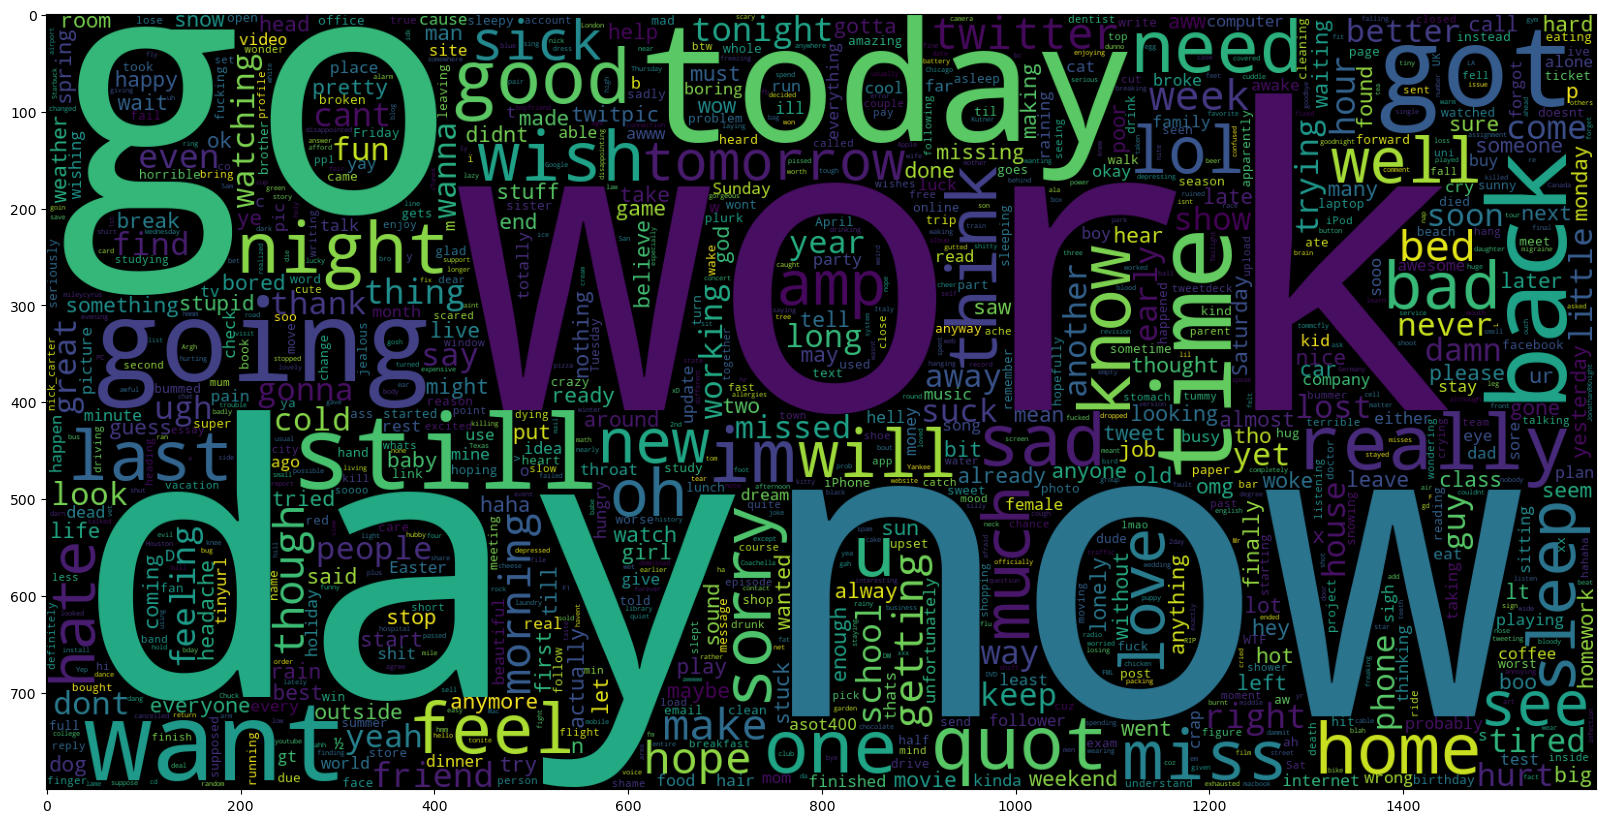

In [29]:
data_neg = data['text'][:20000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

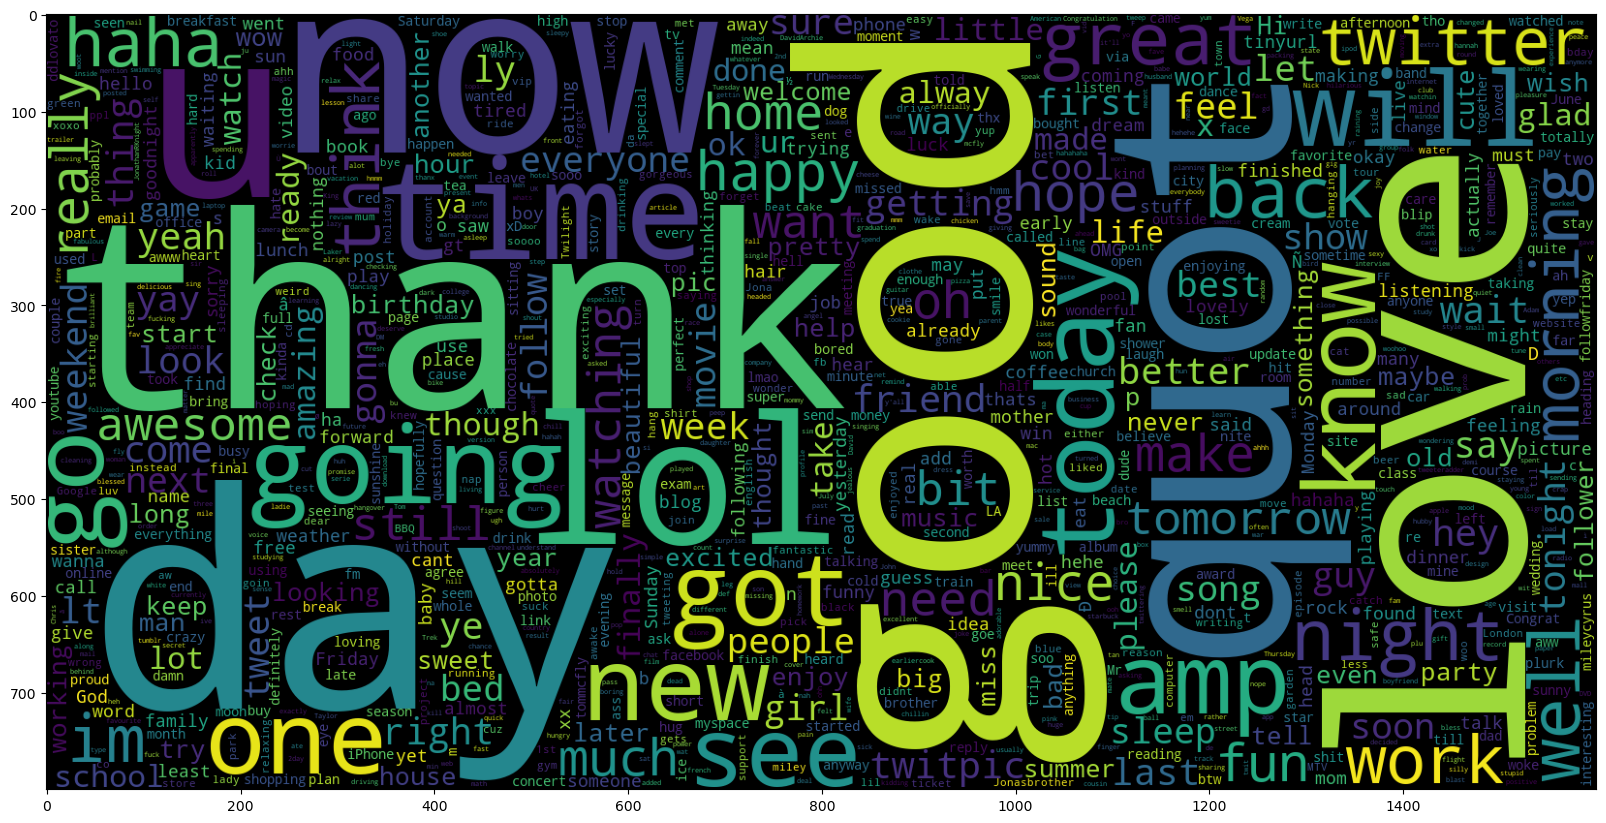

In [30]:
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [31]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [32]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


In [33]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [35]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



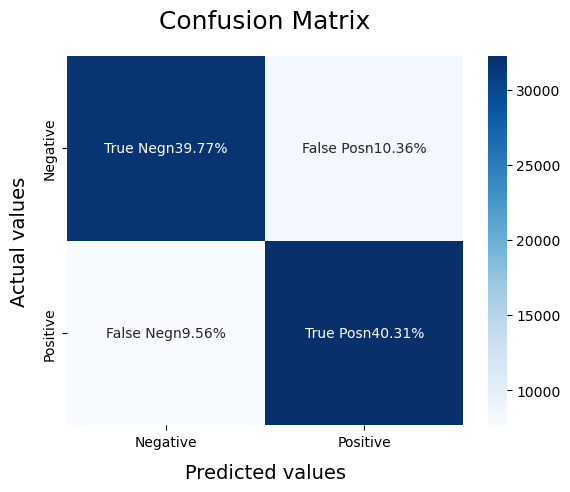

In [36]:
# Model building
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

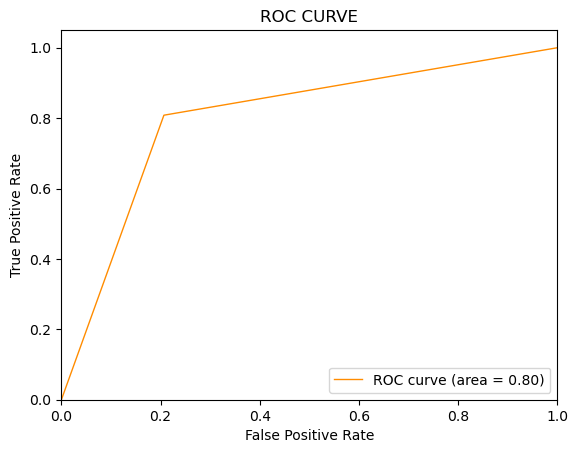

In [37]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



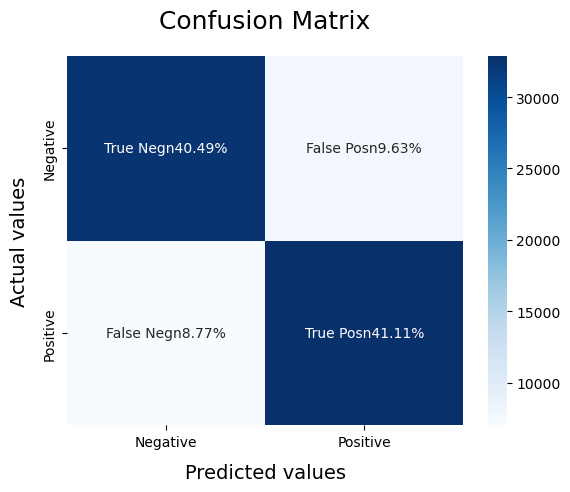

In [38]:
#Model 2
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

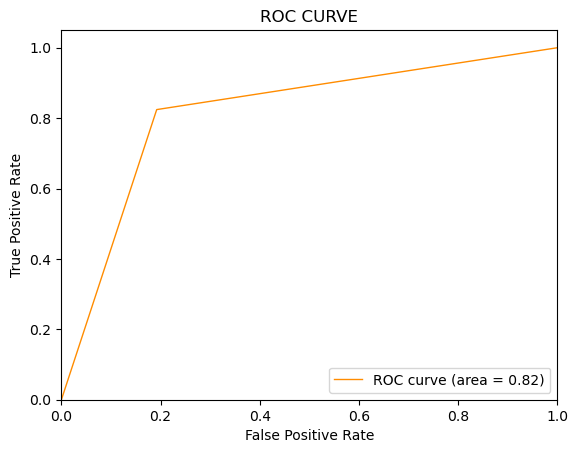

In [39]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



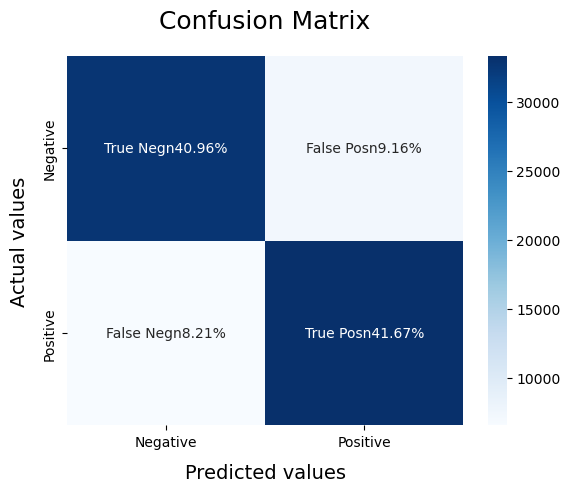

In [40]:
# model 3
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

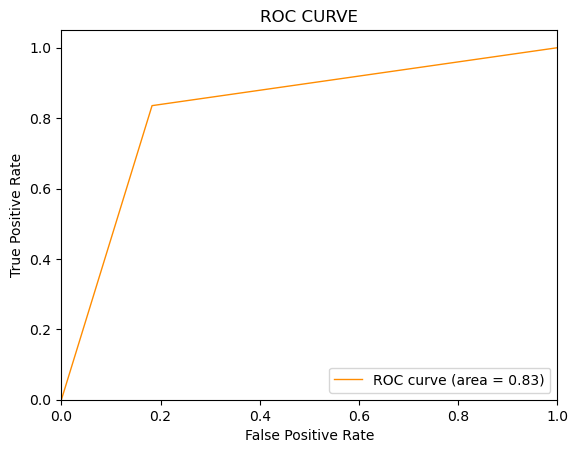

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()